<a href="https://colab.research.google.com/github/youngseo21/doit_pandas/blob/master/assignment_110722_classification(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHAPTER 04 분류**
___

## **01 분류(Classification)의 개요**
____
- 지도 학습은 Label, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방법이다.
- **분류(Classification)**는 지도학습의 대표적인 유형으로 학습 데이터로 주어진 데이터의 Feature와 Label값(결정값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때, 미지의 Label 값을 예측하는 것이다.
- 즉, 기존 데이터가 어떤 Label에 속하는지에 대한 패턴을 알고리즘을 인지한 뒤, 새롭게 관측된 데이터에 대한 Label을 판별한다.
- 분류의 다양한 머신러닝 알고리즘
  + 나이브 베이즈(Naive Bayes) : 베이즈 통계와 생성 모델을 기반으로 하는 알고리즘
  + 로지스틱 회귀(Logstic Regression) : 독립변수와 종속 변수의 선형 관계성에 기반한 알고리즘
  + 결정 트리(Decision Tree) : 데이터 균일도에 따른 규칙 기반의 알고리즘
  + 서포트 벡터 머신(Support Vector Machine) : 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 알고리즘
  + 최소 근접 알고리즘(Nearest Neighbor) : 근접 거리를 기준으로 하는 알고리즘
  + 신경망(Neural Network) : 심층 연결 기반의 알고리즘
  + 서로 다른 머신러닝 알고리즘을 결합한 앙상블(Ensemble) : 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 알고리즘
- 이번 장에서는 위와 같은 다양한 알고리즘 중 **앙상블 방법(Ensemble Method)**을 집중적으로 다룬다.
  + 앙상블은 분류에서 가장 각광을 받는 방법 중 하나이다.
  + 정형 데이터의 예측 분석 영역에서 매우 높은 예측 성능을 보여 애용되고 있다.
  + 일반적으로 Bagging과 Boosting 방식으로 나뉜다.
    1. 랜덤 포레스트(Random Forest) : Bagging 방식의 대표적인 알고리즘 중 하나로 뛰어난 예측 성능, 상대적으로 빠른 수행 시간과 유연성 등으로 많은 분석가가 애용하는 알고리즘이다.
    2. 그래디언트 부스팅(Gradient Boosting) : 뛰어난 예측 성능을 가지고 있는 알고리즘으로 수행 시간이 길다는 단점 때문에 최적화 모델 튜닝이 어려웠으나 최근 이를 보완하는 알고리즘이 등장하면서 활용도가 높은 알고리즘으로 자리 잡았다.
- **결정 트리**는 매우 쉽고 유연하게 적용될 수 있는 알고리즘이다.
  + 데이터의 스케일링이나 정규화 등 사전 가공의 영향이 매우 적다.
  + 다만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인해 과적합(overfitting)이 발생해 반대로 예측 성능이 저하될 수 있다.
  + 하지만 앙상블에서는 약한 학습기(= 예측 성능이 상대적으로 떨어지는 학습 알고리즘)을 여러 개 결합해 확률적 보완가 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상하는데, 결정 트리의 이러한 단점이 장점으로 작용한다.

## **02 결정 트리**
____
- 결정 트리(Decision Tree)는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘으로, 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만든다.
- '데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가'가 알고리즘의 성능을 크게 좌우한다.
- 결정 트리의 구조
  1. 규칙 노드(Decision Node) : 규칙 조건. 데이터셋에 Feature가 있고 이러한 Feature가 결합해 규칙 조건을 만들 때마다 만들어진다.
  2. 리프 노드(Leaf Node) : 결정된 클래스 값
  3. 새로운 규칙 조건마다 서브 트리(Sub Tree)가 생성된다.

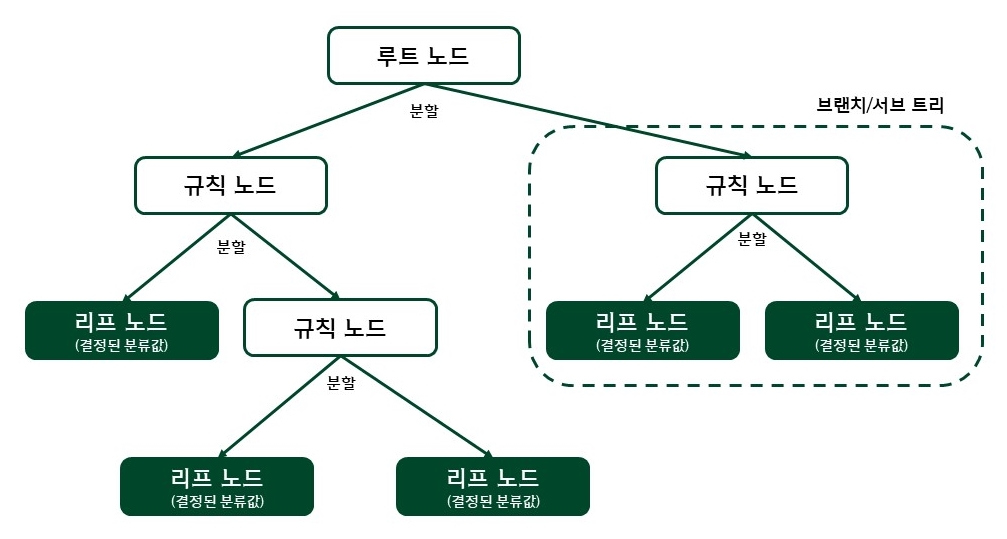)

- 규칙이 많아지면, 분류를 결정하는 방식이 복잡해지는 것으로 과적합으로 이어지기 쉽다. 즉, 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.
- 결정 노드의 수를 줄여 높은 예측 정확도를 가지려면, 데이터를 분류할 때, 최대한 많은 데이터셋이 해당 분류에 속할 수 있도록 결정 노드의 규칙을 정해야 한다.
- 이를 위해서는 **'어떻게 트리를 분할(Split)할 것인가'**가 중요한데, 최대한 균일한 데이터셋을 구성할 수 있도록 분할해야 한다.
  + 데이터셋이 균일하다는 것은 데이터셋 내에 같은 데이터가 얼마나 있는지로 볼 수 있다.
  + 데이터셋의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미친다.
  + 정보 균일도가 높은 데이터셋으로 쪼개질 수 있도록 조건을 찾아 서브 데이터셋을 만드록, 다시 이 서브 데이터셋에서 균일도가 높은 데이터셋으로 쪼개는 방식을 반복하는 방식으로 데이터 값을 예측한다.
  + 정보의 균일도를 측정하는 방법 중 한 가지로 엔트로피를 이용한 정보 이득(Information Gain) 지수와 지니 계수가 있다.
    1. **정보 이득** : 주어진 데이터 집합의 혼잡도를 의미하는 엔트로피 개념을 기반으로 하는데,  **1에서 엔트로피 지수를 뺀 값**에 해당한다. 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮으므로, 데이터가 균일할 수록 정보 이득이 높아, 정보 이득이 높은 속성을 기준으로 분할한다.
    2. **지니 계수** : 원래 경제학에서 **불평등 지수를 나타낼 때 사용하는 계수**로, 0이 가장 평등하고 1로 갈수록 불평등하다. 머신러닝에서는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 가장 낮은 속성을 기준으로 분할한다.
  + 결정트리 알고리즘을 사이킷런에서 구현한 `DecisionTreeClassifier`는 지니 계수를 기본으로 사용하여 데이터셋을 분할한다.

### | **결정 트리 모델의 특징**
___
- 결정 트리의 가장 큰 장점은 정보의 '균일도'라는 규칙을 기반으로 하고 있어, 알고리즘이 쉽고 직관적이라는 점이다.
- 결정 트리는 규칙이 매우 명확하고, 이에 기반해 어떻게 규칙 노드와 리프 노드가 만들어지는지를 알 수 있으며, 시각화까지 할 수 있다.
- 또한 정보의 균일도만 신경 쓰면, 특별한 경우를 제외하고는 전처리 작업(피처 스케일링, 정규화 등)이 필요 없다.
- 다만 과적합으로 정확도가 떨어질 수 있다는 단점이 있다. 따라서 트리의 크기(깊이)를 사전에 제한하는 성능 튜닝이 필요하다.

### | **결정 트리 파라미터**
___
- 사이킷런은 결정 트리 알고리즘을 구현한 `DecisionTreeClassifier`(분류)와 `DecisionTreeRegressor`(회귀) 클래스를 제공한다.
- 사이킷런의 결정 트리는 CART(Classification And Regression Trees) 알고리즘으로 구현되었다.
- 이번 장에서는 분류를 위한 `DecisionTreeClassifier` 클래스만 다룬다.
- `DecisionTreeClassifier`와 `DecisionTreeRegressor`의 파라미터
  1. `min_samples_split` : 노드를 분할하기 위한 최소한의 샘플 데이터 수. Default 값은 2이다. 과적합을 제어할 수 있다. 작게 설정할수록 분할되는 노드가 많아져 과적합 가능성이 증가한다.
  2. `min_samples_leaf` : 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수. 과적합을 제어할 수 있다. 다만 비대칭적 데이터의 경우, 특정 클래스의 데이터가 극도로 작을 수 있어 작게 설정해야 한다.
  3. `max_features` : 최적의 분할을 위해 고려할 최대 피처 개수.
    + int 형 : 대상 Feature의 개수
    + float 형 : 전체 Feature 중 대상 Feature의 비율
    + `sqrt` : 전체 Feature 중, sqrt(전체 피처 개수)만큼 선정
    + `auto` : `sqrt`와 동일
    + `log` : 전체 피처 중 log2(전체 피처 개수) 선정
    + `None` : Default. 데이터 세트의 모든 피처 선정
  4. `max_depth` : 트리의 최대 깊이. Default는 None으로 완벽하게 클래스 결정값이 될 때까지 깊이를 계수 키우며 분할하거나 노드가 가지는 데이터 개수가 `min_samples_split`보다 작아질 때까지 계속 깊이를 증가시킨다. 깊이가 깊어지면 과접합할 수 있다.
  5. `max_leaf_nodes` : 말단 노드(Leaf)의 최대 개수


### | **결정 트리 모델의 시각화**
___
- `Graphviz` 패키지를 이용하여, 결정 트리 알고리즘을 시각화할 수 있다.
-  사이킷런은 `Graphviz` 패키지와 쉽게 인터페이스할 수 있도록 `export_graphviz()` API를 제공한다. `export_graphviz()`는 학습이 완료된 Estimator, Feature의 이름 리스트, Lable 이름 리스트를 입력받아, 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여준다.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state = 156)

In [3]:
# 붓꽃 데이터를 로딩, 학습/테스트 데이터셋 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2,  random_state = 11)

In [4]:
# DecisionTreeClassifer 학습.
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [5]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , feature_names = iris_data.feature_names, impurity=True, filled=True)

In [7]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

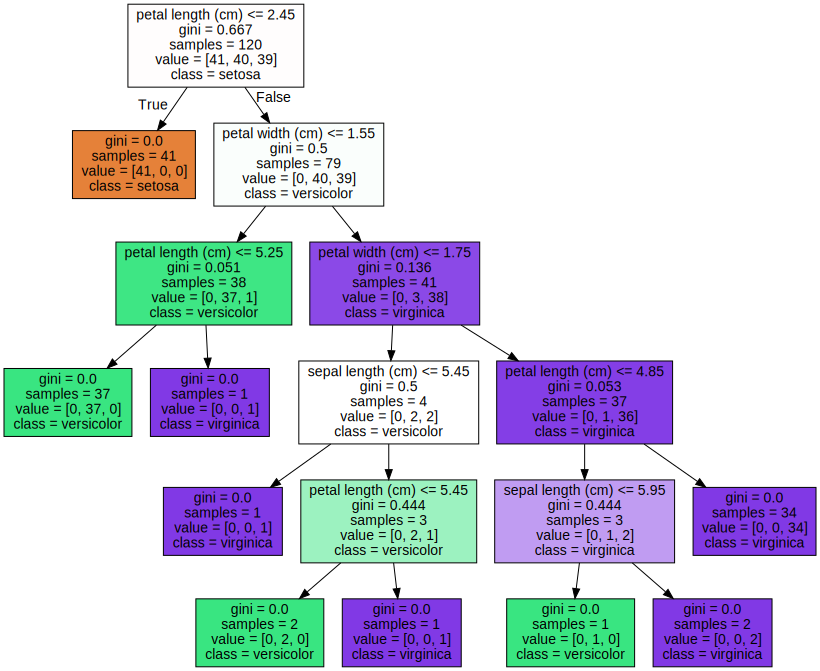

In [6]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 리프 노드(Leaf node)
  + 더이상 자식 노드가 없는 노드
  + Label 값이 결정되는 노드
  + 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족해야 한다.
- 브랜치 노드(Branch Node)
  + 자식 노드가 있는 노드
  + 자식 노드를 만들기 위한 분할 조건을 가지고 있다.
- 위 그림에서,
  1. `petal length (cm) <= 5.25` : 자식 노드를 만들기 위한 규칙 조건. 이 조건이 없으면 리프 노드이다.
  2. `gini` : 아래의 `value = []`로 주어진 데이터 분포에서의 지니 계수
  3. `samples` 현 규칙에 해당하는 데이터 건수
  4. `value = []` : 클래스 값 기반의 데이터 건수. Value = [41.40.39]이면 클래스 값 순서대로 Setosa 41개, Vesicolor 40개, Virginica 39개로 구성되어 있는 데이터이다.
  5. `class = []` : 하위 노드를 가질 경우 [ ] 안의 개수가 제일 많다는 의미

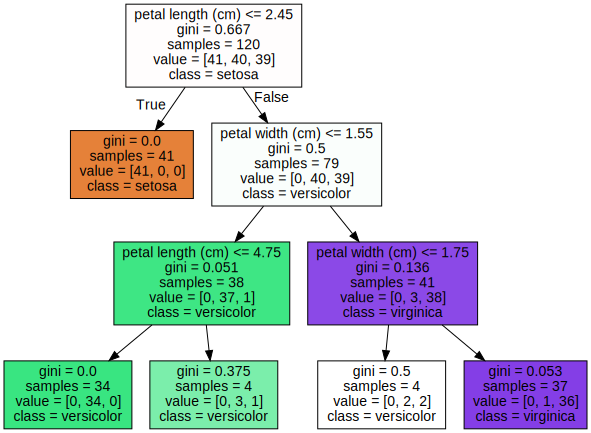

In [9]:
# max_depth, min_samples_leaf 설정
# 결정 트리가 더 간결해진다
dt_clf1 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 4, random_state = 156)
dt_clf1.fit(X_train , y_train)

export_graphviz(dt_clf1, out_file="tree.dot", class_names=iris_data.target_names , feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정할 때 Feature가 얼마나 중요한지를 `DecisionTreeClassifier` 객체의 `feature_importances_` 속성으로 제공한다. 이때, `feature_importances_`는 ndarray 형태로 값을 반환하며 Feature 순서대로 값이 할당된다.

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


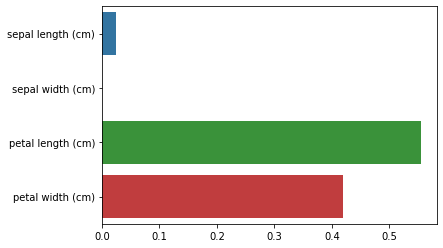

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

- 여러 Feature들 중 `petal_length`의 중요도가 가장 높다.

### | **결정 트리 과적합(Overfitting)**
___
- 결정 트리의 학습 데이터를 분할해 예측을 수행하는 과정과 이로 인한 과적합 문제를 시각화해 알아본다.
- `make_classification()` : 사이킷런에서 분류를 위한 테스트용 데이터를 만드는 함수. Feature 데이터셋과 클래스 Label 데이터셋을 반환한다.

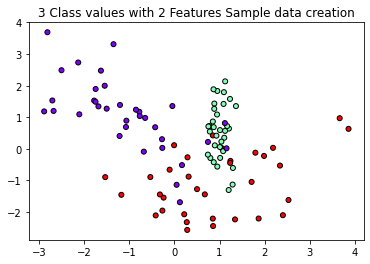

In [10]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, n_classes = 3, n_clusters_per_class = 1,random_state = 0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker = 'o', c = y_labels, s = 25, cmap = 'rainbow', edgecolor = 'k')

- 위 그래프는 각 Feature가 X, Y축인 2차원 그래프이며, 3개의 클래스 값이 색깔로 구분되어 있다.
- 이제 `X_features`와 `y_labels` 데이터셋을 기반으로 결정 트리 모델을 학습하자.
- 첫 번째 학습 때는 별다른 제약 없이 하이퍼 파라미터를 디폴트로 하여, 결정 트리 모델이 어떠한 결정 기준을 가지고 분할하면서 데이터를 분류하는지 확인한다.
- 이를 위해 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내는 함수인 `visualize_boundary()`함수를 생성해, 모델이 어떻게 데이터셋을 예측 분류하는지 이해한다.

In [11]:
import numpy as np

# visualize_boundary() 함수
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

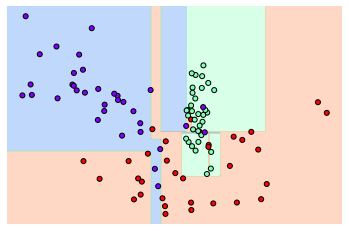

In [12]:
# 첫번째 학습 : 하이퍼 파라미터를 디폴트 값으로 설정
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 Decsion Boundary 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 일부 이상치 데이터(Outlier)까지 분류하기 위해 분할이 자주 일어나, 결정 기준 경계가 매우 많아졌다.
- 데어티가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준 때문에, 모델의 예측 정확도가 떨어진다.
- `min_samples_leaf = 6`으로 설정해, 리프 노드 생성 규칙을 완하한 뒤, 결정 기준 경계가 어떻게 변하는지 살펴보도록 한다.

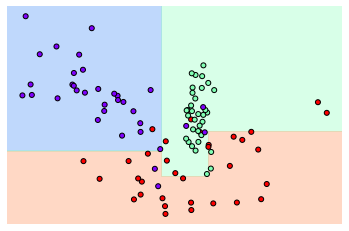

In [13]:
# 두번째 학습
# min_samples_leaf = 6으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

## **03 앙상블 학습**
____

### | **앙상블 학습 개요**
___
- **앙상블 학습(Ensemble Learning)을 통한 분류** : 여러 개의 Classifier를 생성하고, 그 예측을 결합하여 정확한 최종 예측을 도출하는 기법으로, 다양한 분류기의 예측 결과를 결합해 단일 분류기보다 신뢰성이 높은 예측값을 얻는다.
- 이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이고 있지만, 대부분의 정형 데이터 분류는 앙상블이 뛰어난 성능을 보인다.
- 대표적인 앙상블 알고리즘인 **랜덤 포레스트, 그래디언트 부스팅**은 뛰어난 성능과 쉬운 사용, 다양한 활용도로 인해 많이 애용된다.
- Boosting 계열의 앙상블 알고리즘의 인기로 XGBoost, LightGBM, Stacking 등 그래디언트 부스팅을 뛰어넘는 새로운 알고리즘들이 개발되고 있다.
- 대표적인 앙상블 학습의 유형 : Voting, Bagging, Boosting 
  + Voting과 Bagging은 여러 개의 Classifier가 투표를 통해 최종 예측 결과를 결정한다. Voting은 일반적으로 서로 다른 알고리즘을 가진 Classifier가 결합하지만, Bagging은 데이터 샘플링을 서로 다르게 하여 모두 같은 유형의 알고리즘을 기반으로 학습을 수행하고, Voting을 수행한다.
  1. **Voting 방식** : **같은 데이터셋**에 대해 학습하고 예측한 결과를 가지고 Voting을 통해 최종 예측 결과를 선정한다.(선형 회귀, K 최근접 이웃, 서포트 벡터 머신)
  2. **Bagging 방식** : Bootrapping 방식으로 샘플링된 데이터셋들에 대해 각각 학습을 하고, 개별적으로 예측한 결과를 Voting을 통해 최정 예측 결과를 선정한다.
    + **Bootstrapping 분할 방식** : 개별 Classifier에게 데이터를 샘플링해서 추출하는 방식
    + 교차검증과 다르게 Bagging은 중첩을 허용한다.
    + 랜덤 포레스트가 대표적인 Bagging 방법이다.
  3. **Boosting 방식** : 여러 개의 Classifier가 순차적으로 학습을 수행하되, 앞에서 학습한 Classifier가 잘못 예측한 데이터에 대해서 올바르게 예측할 수 있다라고 가중치를 부여하여 다음 Classifier에서 학습과 예측을 진행한다.
    + 그래디언트 부스팅, XGBoost, LightGBM
  4. **Stacking 방식** : 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어 다른 모델(메타 모델)로 재학습시켜 결과를 예측한다.

### | **보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)**
___
1. **하드 보팅(Hard Voting)** : 예측한 결과값들 중 다수의 Classifier가 결정한 예측값을 최종 보팅 결과값으로 선정한다.
2. **소프트 보팅(Soft Voting)** : Classifier들의 Label 값 결정 확률을 모두 더하고 이를 평균해서, 이들 중 확률이 가장 높은 Label 값을 최종 보팅 결과값으로 선정한다.
- 일반적으로 소프팅 보팅의 예측 성능이 좋아 더 많이 사용된다.

### | **보팅 분류기(Voting Classifier)**
___
- 사이킷런은 보팅 방식의 앙상블을 구현한 `VotingClassifier` 클래스를 제공한다.
- 이를 이용하여 위스콘신 유방암 데이터셋을 예측 및 분석해보자.
- 위스콘신 유방암 데이터셋은 유방암의 악성종양, 양성종양 여부를 결정하는 이진분류 데이터셋이다.
- 로지스틱 회귀와 KNN을 기반인 Voting Classifier를 만든다.

In [14]:
# import package
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# import data
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


- `VotingClassifier` 클래스는 주요 파라미터로 `estimators`와 `voting` 값을 입력받는다.
  1. `estimators` : 리스트 값으로, Voting에 사용될 여러 개의 Classifier 객체들을 tuple 형식으로 입력 받는다.
  2. `voting` : `hard`는 하드 보팅, `soft`는 소프트 보팅 방식을 적용하라는 의미로, default 값은 `hard`이다.

In [15]:
# Logistic Regression, KNN
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 Classifier 
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft')

# 학습/테스트 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


- Voting 분류기의 정확도가 조금 높게 나타났다. 
- Voting으로 여러 개의 Classifier를 결합하더라도, 무조건 단일 Classifier보다 성능이 좋은 것은 아니다.
- 그럼에도 불구하고, 전반적으로 앙상블 방법은 단일 ML 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많다.
- 현실 세계는 다양한 변수와 예측이 어려운 규칙으로 구성되어 있어, 다양한 관점을 가진 알고리즘이 서로 결합해 더 나은 성능을 실제 환경에서 이끌어낼 수 있다.
- ML 모델의 성능은 다양한 테스트 데이터에 의해 검증되므로, '높은 유연성을 가지고 현실에 대처할 수 있는가'가 ML 모델의 중요한 평가 요소로 작용한다.

## **04 랜덤 포레스트**
____


### | **랜덤 포레스트의 개요 및 실습**
___
- Bagging(Booststrap aggregating)은 **같은 알고리즘**으로 여러 개의 Classifier를 만들어 Voting으로 최종 결정하는 알고리즘이다.
- Bagging의 대표적인 알고리즘인 랜덤 포레스트는 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지며, 다양한 영역에서 높은 예측 성능을 보인다.
- 랜덤 포레스트의 기반 알고리즘은 결정 트리로, 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있다.
- 랜덤 포레스트 : 여러 개의 결정 트리 Classifier가 전체 대이터에서 Bagging 방식으로 각자의 데이터를 샘플링해 개별적으로 학습한 뒤, 모든 Classifier가 Voting을 통해 예측 결정을 한다.
- Bootstrapping 방식 : 여러 개의 데이터셋을 중첩되게 분리한다. 
  + 통계학에서는 원래 여러 개의 작은 데이터셋을 임의로 만들어 개별 평균의 분포도를 측정하는 등의 목적을 위한 샘플링 방식을 지칭한다.
  + 랜덤 포레스트의 Subset의 데이터 건수는 전체 데이터 건수와 동일하지만, 개별 데이터가 중첩되어 만들어진다.
- 사이킷런은 랜덤 포레스트 기반으로 분류를 수행하는 `RandomForestClassifier` 클래스를 지원한다.

In [2]:
import pandas as pd

# ValueError: Duplicate names are not allowed
# 위 오류를 수정하기 위한 코드
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

# 사용자 행동 데이터셋에 DataFrame을 반환하는 함수
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('/content/drive/MyDrive/esaa_data/UCI HAR dataset/features.txt',sep='\s+', header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. Column 명은 feature_name 적용
    My_X_train = pd.read_csv('/content/drive/MyDrive/esaa_data/UCI HAR dataset/X_train.txt',sep='\s+', names = feature_name)
    My_X_test = pd.read_csv('/content/drive/MyDrive/esaa_data/UCI HAR dataset/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    My_y_train = pd.read_csv('/content/drive/MyDrive/esaa_data/UCI HAR dataset/y_train.txt',sep='\s+',header=None,names=['action'])
    My_y_test = pd.read_csv('/content/drive/MyDrive/esaa_data/UCI HAR dataset/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return My_X_train, My_X_test, My_y_train, My_y_test

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)

# 별도의 테스트셋으로 예측 성능 평가
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### | **랜덤 포레스트 하이퍼 파라미터 및 튜닝**
___
- 하이퍼 파라미터가 너무 많고, 그로 인해 튜닝이 오래 걸리며, 이에 비해 성능이 크게 향상되지 않다는 것이 트리 기반 앙상블 알고리즘의 단점이다.
- 랜덤 포레스트의 하이퍼 파라미터
  1. `n_estimators` : 랜덤 포레스트에서 결정 트리의 개수를 지정한다. Default는 10개. 많이 설정한다고 해서 성능이 무조건 향상되는 것은 아니며, 늘릴수록 학습 수행 시간이 길어진다.
  2. `max_features` : 결정 트리와 동일하게 최적의 분할을 위해 고려할 최대 피처 개수를 지정한다. 다만 Default 값은 `auto(sqrt)`이다.
  3. `max_depth` : 트리의 최대 깊이. Default는 None으로 완벽하게 클래스 결정값이 될 때까지 깊이를 계수 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킨다. 깊이가 깊어지면 과적합할 수 있다.
  4. `min_samples_leaf` : 말단 노드(Leaf)의 최대 개수
- `GridSearchCV`를 이용해 랜덤 포레스틔 하이퍼 파라미터를 튜닝해보자.

In [4]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9165


- `max_depth`가 16, `min_samples_leaf`은 6, `min_samples_split`가 2일 때, 약 91.65%의 평균 정확도가 측정되었다.
- `n_estimators`를 300으로 증가시키고, 최적화 하이퍼 파라미터로 다시 학습한 후, 별도의 테스트 데이터셋에서 예측 성능을 측정해보자.

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=100,  min_samples_leaf=6, max_depth=16, min_samples_split=2, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9260


- 예측 성능이 좋아진 것을 확인할 수 있다.
- Feature의 중요도를 막대 그래프로 시각해보자.

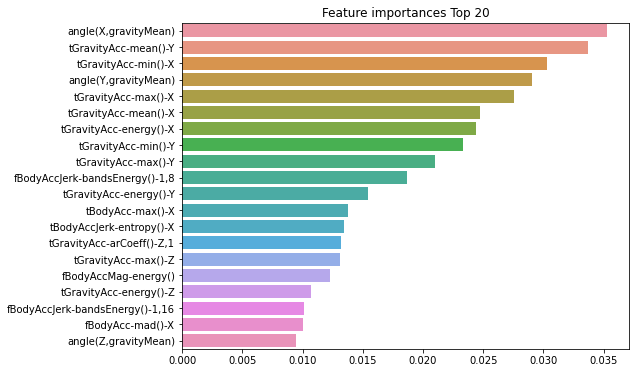

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## **05 GBM(Gradient Boosting Machine)**
____

### | **GBM의 개요 및 실습**
___
- Boosting 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습, 예측하면서 잘못 예측한 데이터에 가중치를 부여하여 오류를 개선하며 학습하는 방식이다.
- 대표적인 알고리즘으로는 AdaBoost(Adaptive boosting)와 그래디언트 부스트가 있다.
  1. 에이다 부스트(AdaBoost) : 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
  2. GBM(Gradient Boost Machine) : 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법을 이용한다.
    + 경사 하강법(Gradient Descent) : 오류식 h(x) = y - F(x)를 최소화하는 방향으로 가중치를 업데이트한다.
    + 분류는 물론 회귀도 가능하다.
- 사이킷런은 GBM 기반의 분류를 위해 `GradientBoostingClassifier` 클래스를 제공한다.

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 820.0 초 


- 기본 하이퍼 파라미터만으로 % 예측 정확도로 앞의 랜덤 포레스트보다 나은 예측 성능을 보인다.
- 일반적으로 GBM이 랜덤 포레스트보다 예측 성능이 조금 더 뛰어나다.
- 그러나 수행 시간이 길고, 하이퍼 파라미터를 튜닝이 어렵다는 단점이 있다.

### | **GBM 하이퍼 파라미터 및 튜닝**
___
- GBM의 하이퍼 파라미터
  1. `n_estimators` : weak learner의 개수로 Default는 100이다. 늘릴수록 성능은 좋아질 수 있으나, 학습 수행 시간이 길어진다.
  2. `subsample` : weak learner가 학습에 사용하는 데이터의 샘플링 비율로 Default는 1(전체 학습 데이터를 기반으로 학습)이다.
  3. `loss` : 경사 하강법에 사용할 loss 함수를 지정한다. Default는 `deciance`이다.
  4. `learning_rate` : GBM이 학습을 진행할 때마다 적용하는 학습률. Weak learner가 순차적으로 오류값을 보정할 때 적용하는 계수이며, 0~1 사이의 값을 지정할 수 있다. Default는 0.1이다.
    + 너무 작은 값을 적용하면, 업데이트 되는 값이 작아져 최소 오류값을 찾아 예측 성능이 높아질 수 있지만, 수행 시간이 오래 걸리고, 최소 오류값을 못 찾을 수도 있다.
    + 너무 큰 값을 적용하면, 최소 오류값을 그냥 지나쳐 예측 성능이 떨어질 가능성이 높지만, 빠른 수행이 가능하다.
    + `learning_rate`와 `n_estimators`는 상호 보완적으로 조합해 사용한다.
- 그 외에 `max_depth`, `max_features`도 파라미터로 가진다.
- GridSearchCV를 이용해 하이퍼 파라미터를 최적화해보자.
- 수행 시간을 고려하여, `n_estimators`를 100, 500으로, `learning_rate`을 0.05, 0.1로만 제한한다.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9002


In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9393


- GBM은 과적합에도 강한 뛰어난 예측 성능을 가졌다.
- 다만 수행 시간이 오래 걸린다.